In [5]:
using Metatheory
using Metatheory.EGraphs
using Metatheory.Library

In [12]:
comm_monoid = @theory  a b c begin
    # commutativity
    a * b => b * a
    # identity
    a * 1 => a
    # associativity
    a * (b * c) => (a * b) * c
    (a * b) * c => a * (b * c)
end;

In [7]:
    comm_group = @theory a b c begin
        # commutativity
        a + b => b + a
        # identity
        a + 0 => a
        # associativity
        a + (b + c) => (a + b) + c
        (a + b) + c => a + (b + c)
        # inverse
        a + (-a) => 0
    end;

In [45]:
# dynamic rules are defined with the `|>` operator
folder = @theory a b begin
    a::Real + b::Real => a+b
    a::Real * b::Real => a*b
end;

In [52]:
div_sim = @theory a b c begin
    (a * b) / c => a * (b / c)
    a::Real / a::Real => (a != 0 ? 1 : error("division by 0"))
end;

In [53]:
t = union(comm_monoid, comm_group, folder, div_sim) ;
g = EGraph(:(a * (2*3) / 6));

In [54]:
saturate!(g, t);
ex = extract!(g, astsize)

MethodError: MethodError: no method matching /(::EClass, ::Int64)

Closest candidates are:
  /(!Matched::Missing, ::Number)
   @ Base missing.jl:123
  /(!Matched::LinearAlgebra.UnitUpperTriangular, ::Number)
   @ LinearAlgebra C:\Users\jetti\.julia\juliaup\julia-1.10.2+0.x64.w64.mingw32\share\julia\stdlib\v1.10\LinearAlgebra\src\triangular.jl:892
  /(!Matched::LinearAlgebra.LowerTriangular, ::Number)
   @ LinearAlgebra C:\Users\jetti\.julia\juliaup\julia-1.10.2+0.x64.w64.mingw32\share\julia\stdlib\v1.10\LinearAlgebra\src\triangular.jl:890
  ...


In [34]:
include("calculational_logic_theory.jl")

19-element Vector{AbstractRule}:
 (~p == ~q) == ~r == ~p == (~q == ~r)
 ~p == ~q == ~q == ~p
 ~q == ~q --> true
 !(~p == ~q) == !(~p) == ~q
 ~p != ~q == !(~p == ~q)
 (~p || ~q) || ~r == ~p || (~q || ~r)
 ~p || ~q == ~q || ~p
 ~p || ~p --> ~p
 ~p || ~q == ~r == ~p || (~q == ~p || ~r)
 ~p || !(~p) --> true
 !(~p || ~q) == !(~p) && !(~q)
 !(~p && ~q) == !(~p) || !(~q)
 ~p && ~q == (~p == ~q) == ~p || ~q
 ~p ⟹ ~q == (~p || ~q) == ~q
 ~(p::Bool) == ~(q::Bool) => p == q
 ~(p::Bool) || ~(q::Bool) => p || q
 ~(p::Bool) ⟹ ~(q::Bool) => (p || q) == q
 ~(p::Bool) && ~(q::Bool) => p && q
 !(~(p::Bool)) => !p

In [61]:
using Metatheory

r1 = @rule sin(2(~x)) --> 2sin(~x)*cos(~x)

expr = :(sin(2z))
r1(expr)

:((2 * sin(z)) * cos(z))

In [38]:
include("basic_maths_theory.jl")

postprocess_maths (generic function with 1 method)

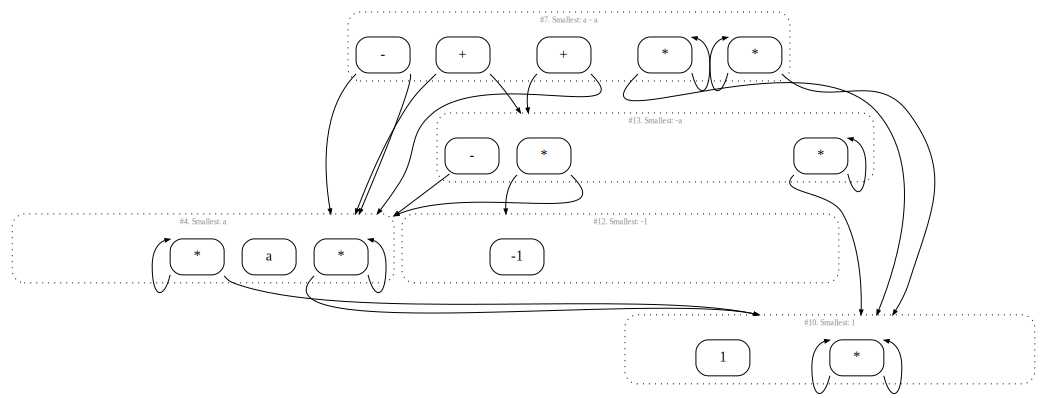

In [41]:
using GraphViz

include(dirname(pathof(Metatheory)) * "/extras/graphviz.jl")

algebra_rules = @theory a b c begin
  a * (b * c) == (a * b) * c
  a + (b + c) == (a + b) + c

  a + b == b + a
  a * (b + c) == (a * b) + (a * c)
  (a + b) * c == (a * c) + (b * c)

  -a == -1 * a
  a - b == a + -b
  1 * a == a

  0 * a --> 0
  a + 0 --> a

  a::Number * b == b * a::Number
  a::Number * b::Number => a * b
  a::Number + b::Number => a + b
end;

ex = :(a - a)
g = EGraph(ex)
params = SaturationParams(; timeout = 2)
saturate!(g, algebra_rules, params)
g

In [69]:
test = @theory begin
    :a --> :b
end

1-element Vector{RewriteRule}:
 a --> b

In [14]:
#ex = :(0)
g = EGraph(:a)
saturate!(g, test)
extract!(g, astsize)

MethodError: MethodError: no method matching saturate!(::EGraph, ::Int64)

Closest candidates are:
  saturate!(::EGraph, !Matched::Vector{<:AbstractRule}, !Matched::Any)
   @ Metatheory C:\Users\jetti\.julia\packages\Metatheory\ooi9X\src\EGraphs\saturation.jl:286
  saturate!(::EGraph, !Matched::Vector{<:AbstractRule})
   @ Metatheory C:\Users\jetti\.julia\packages\Metatheory\ooi9X\src\EGraphs\saturation.jl:286
